### Sample program for Naive Bayes Classifier   

#### Import libraries  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#### Parameters  

In [3]:
csv_in = 'spam.csv'

# To show all columns and rows  
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file
Delimiter should be ',', no rows to be skipped.  
The first line should be the header.  
Encoding should be set to 'latin-1'.

In [4]:
df = pd.read_csv(csv_in, skiprows=0, delimiter=',',
                 header=0, encoding='latin-1')
print(df.shape)
print(df.info())
display(df.head())

(5572, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Check #spam and #ham  

In [5]:
print(df['v1'].value_counts())

ham     4825
spam     747
Name: v1, dtype: int64


#### Obtain X (data) and y (true label)  

In [6]:
X = df['v2']
y = df['v1']

#### Divide data into train data and test data  
NOTE: Specify random_state to fix the way of division  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4179,) (4179,)
(1393,) (1393,)


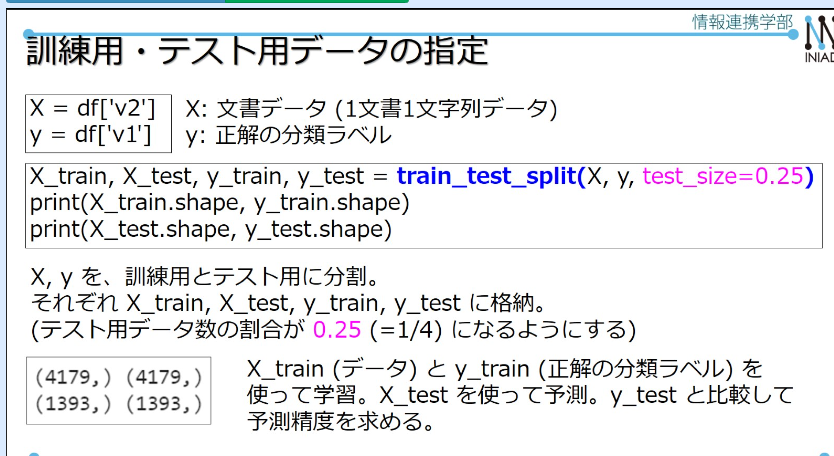

#### Count words  

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
vocab = vectorizer.get_feature_names_out()
print('Vocabulary size:', len(vocab))
print(vocab[:10])  # debug

Vocabulary size: 7448
['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02']


#### Calculate BoW  

In [9]:
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
print('X_train_bow:')
print(repr(X_train_bow))
print('X_test_bow:')
print(repr(X_test_bow))

X_train_bow:
<4179x7448 sparse matrix of type '<class 'numpy.int64'>'
	with 55473 stored elements in Compressed Sparse Row format>
X_test_bow:
<1393x7448 sparse matrix of type '<class 'numpy.int64'>'
	with 17104 stored elements in Compressed Sparse Row format>


#### Display BoW  

In [10]:
Xbow = pd.DataFrame(X_train_bow.toarray(), 
                    index=y_train, columns=vocab)
display(Xbow.head())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,0207,02073162414,02085076972,021,03,04,05,0578,06,07,07008009200,07090201529,07099833605,07123456789,0721072,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,07801543489,07808,07808247860,07815296484,07821230901,078498,07880867867,0789xxxxxxx,07946746291,0796xxxxxx,07973788240,07xxxxxxxxx,08,0800,08000407165,08000776320,08000839402,08000930705,08000938767,08001950382,08002888812,08002986030,08002986906,08002988890,08006344447,0808,08081263000,08081560665,083,0844,08448350055,08448714184,0845,08452810071,08452810073,08452810075over18,0870,08700469649,08700621170150p,08701213186,08701237397,08701417012,08701417012150p,0870141701216,087016248,08701752560,087018728737,0870241182716,08702490080,08702840625,08704050406,0870737910216yrs,08707500020,08707509020,0870753331018,08708034412,08709222922,0871,087104711148,08712103738,0871212025016,08712300220,08712317606,08712400200,08712400602450p,08712400603,08712402050,08712402578,08712402779,08712402902,08712402972,08712404000,08712405020,08712405022,08712460324,08712466669,0871277810710p,0871277810810,0871277810910p,08714342399,087147123779am,08714712379,08714712388,08714712394,08714712412,08715203028,08715203649,08715203652,08715203656,08715203677,08715203685,08715205273,08715500022,08715705022,08717111821,08717168528,08717205546,0871750,08717507382,08717890890å,08717895698,08717898035,08718711108,08718720201,08718723815,08718725756,08718726270,087187262701,08718726970,08718726971,08718726978,087187272008,08718727868,08718727870,08718727870150ppm,08718730555,08718730666,08718738001,08718738002,08718738034,08719180219,08719180248,08719181259,08719181513,08719839835,08719899217,08719899229,08719899230,09,09041940223,09050000301,09050000332,09050000555,09050000878,09050000928,09050001808,09050002311,09050003091,09050005321,09050090044,09050280520,09053750005,09056242159,09057039994,09058091854,09058091870,09058094454,09058094455,09058094565,09058094583,09058094594,09058094597,09058094599,09058095107,09058095201,09058097189,09058098002,09058099801,09061104276,09061104283,09061209465,09061213237,09061221061,09061221066,09061701461,09061701851,09061701939,09061702893,09061743386,09061743806,09061743810,09061743811,09061744553,09061749602,09061790121,09061790126,09063440451,09063442151,09063458130,0906346330,09064011000,09064012103,09064012160,09064015307,09064017295,09064017305,09064018838,09064019014,09064019788,09065069120,09065171142,09065174042,09065394514,09065394973,09065989180,09065989182,09066350750,09066358152,09066358361,09066362206,09066362231,09066364311,09066364349,09066364589,09066368470,09066380611,09066382422,09066612661,09066649731from,09066660100,09071512432,09071517866,09077818151,09090900040,09094100151,09094646899,09095350301,09096102316,09099725823,09099726395,09099726429,09099726553,09111030116,09111032124,09701213186,0a,10,100,1000,1000call,1000s,100p,100percent,100txt,1013,1030,10am,10k,10p,10ppm,10th,11,1120,113,1131,114,1172,118p,11mths,11pm,12,1205,120p,121,1225,123,125,125gift,128,12hours,12hrs,12mths,13,130,1327,14,140ppm,145,1450,146tf150p,14tcr,15,150,1500,150p,150p16,150pm,150ppermesssubscription,150ppm,150ppmpobox10183bhamb64xe,150ppmsg,151,15541,15pm,16,169,177,18,18p,18yrs,195,1956669,1apple,1cup,1da,1er,1hr,1im,1lemon,1million,1pm,1st,1st4terms,1stone,1thing,1tulsi,1win150ppmx3,1winaweek,1winawk,1x150p,1yf,20,200,2000,2003,2004,2005,2006,2007,200p,2025050,20m12aq,20p,21,21870000,21st,22,220,220cm2,2309,23f,23g,24,24hrs,24m,24th,25,250,250k,255,25p,26,2667,26th,27,28,28days,28th,28thfeb,29,2bold,2c,2channel,2day,2end,2ez,2find,2getha,2geva,2go,2gthr,2hrs,2kbsubject,2lands,2moro,2morow,2morro,2morrow,2mro,2mrw,2nd,2nite,2optout,2p,2price,2rcv,2stop,2stoptx,2stoptxt,2u,2waxsto,2wks,2wt,2yr,2yrs,30,300,3000,300603,300603t,300p,3030,30ish,30pp,30s,30th,31,3100,310303,31p,32000,32323,326,33,330,350,3510i,35p,3650,36504,3680,373,3750,38,391784,3aj,3d,3days,

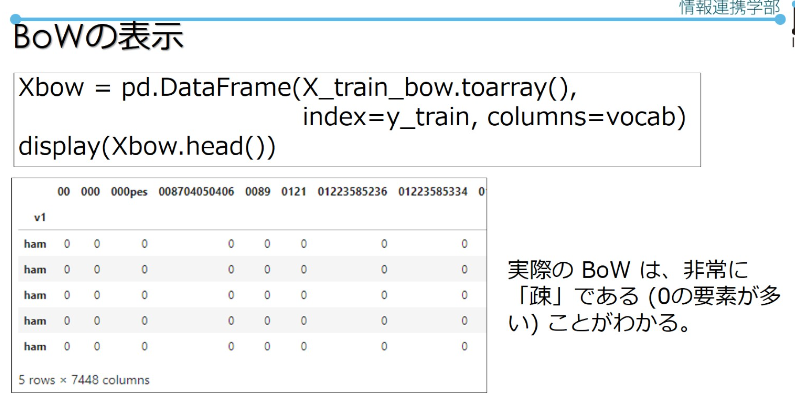

#### Training of naive Bayes classifier  

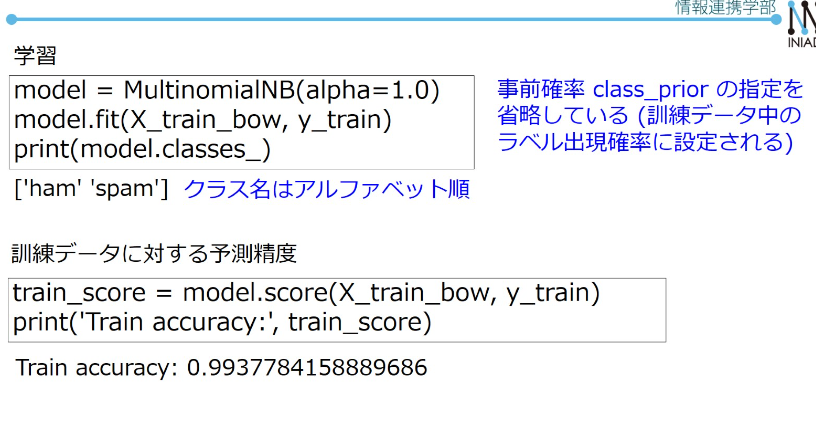

In [11]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train_bow, y_train)
print(model.classes_)

['ham' 'spam']


#### Prediction accuracy for training data  

In [12]:
train_score = model.score(X_train_bow, y_train)
print('Train accuracy:', train_score)

Train accuracy: 0.9937784158889686


#### Prediction using naive Bayes classifier after training  

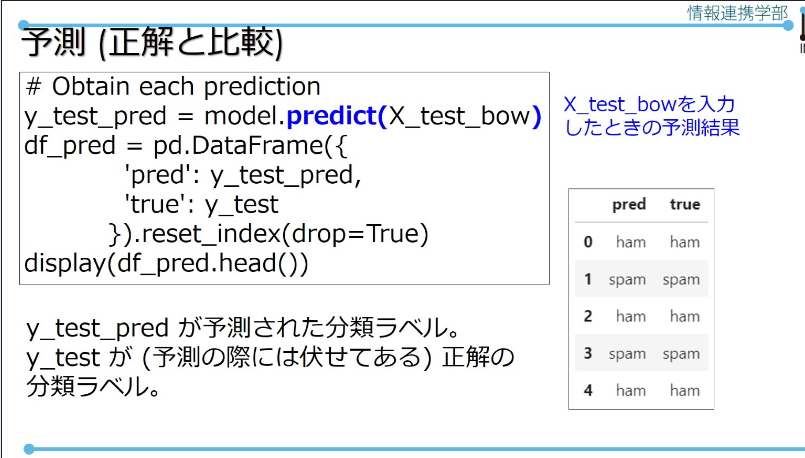

In [13]:
# Obtain each prediction  
y_test_pred = model.predict(X_test_bow)
df_pred = pd.DataFrame({
            'pred': y_test_pred,
            'true': y_test
          }).reset_index(drop=True)
display(df_pred.head())

,pred,true
0,ham,ham
1,spam,spam
2,ham,ham
3,spam,spam
4,ham,ham


In [14]:
# Make crosstable  
ctab = pd.crosstab(df_pred['pred'], df_pred['true'])
display(ctab)

true,ham,spam
pred,,
ham,1223,9
spam,5,156


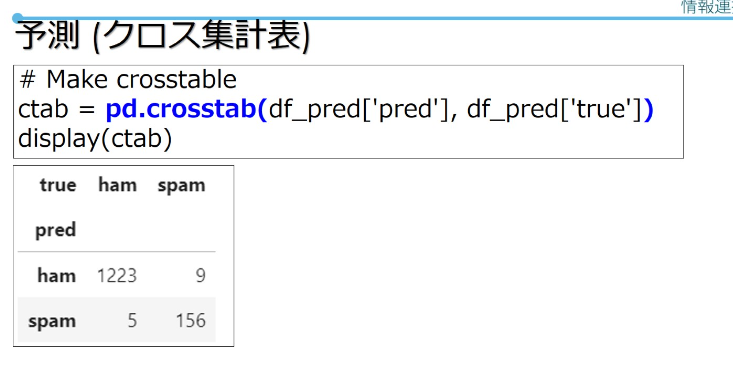

In [15]:
# Prediction accuracy  
test_score = model.score(X_test_bow, y_test)
print('Test accuracy:', test_score)

Test accuracy: 0.9899497487437185


#### Set min_df    

In [16]:
vectorizer = CountVectorizer(min_df=3)
vectorizer.fit(X_train)
vocab = vectorizer.get_feature_names_out()
print('Vocabulary size:', len(vocab))
X_train_bow = vectorizer.transform(X_train)
print(repr(X_train_bow))
X_test_bow = vectorizer.transform(X_test)
model = MultinomialNB(alpha=1.0)
model.fit(X_train_bow, y_train)
print('Train accuracy:', model.score(X_train_bow, y_train))
print('Test accuracy:', model.score(X_test_bow, y_test))
ctab = pd.crosstab(model.predict(X_test_bow), y_test)
ctab = ctab.reset_index(drop=True)
display(ctab)

Vocabulary size: 2333
<4179x2333 sparse matrix of type '<class 'numpy.int64'>'
	with 49238 stored elements in Compressed Sparse Row format>
Train accuracy: 0.9894711653505623
Test accuracy: 0.9877961234745154


v1,ham,spam
0,1220,9
1,8,156


#### Set stop_words  

In [17]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(X_train)
vocab = vectorizer.get_feature_names_out()
print('Vocabulary size:', len(vocab))
X_train_bow = vectorizer.transform(X_train)
print(repr(X_train_bow))
X_test_bow = vectorizer.transform(X_test)
model = MultinomialNB(alpha=1.0)
model.fit(X_train_bow, y_train)
print('Train accuracy:', model.score(X_train_bow, y_train))
print('Test accuracy:', model.score(X_test_bow, y_test))
ctab = pd.crosstab(model.predict(X_test_bow), y_test)
ctab = ctab.reset_index(drop=True)
display(ctab)

Vocabulary size: 7188
<4179x7188 sparse matrix of type '<class 'numpy.int64'>'
	with 32700 stored elements in Compressed Sparse Row format>
Train accuracy: 0.9949748743718593
Test accuracy: 0.9899497487437185


v1,ham,spam
0,1222,8
1,6,157


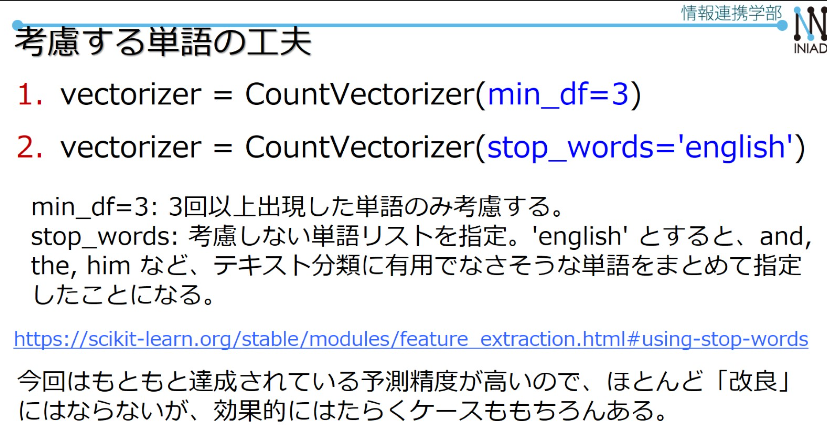